# Klasszifikáció

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## 1. Perceptron két dimenziós adatokra

<b>Emlékeztető.</b> Adottak az $\mathbf{x}_i \in \mathbb{R}^2$ minták és a hozzájuk tartozó $y_i \in \left\lbrace 0,1 \right\rbrace$ osztálycímkék. A célunk, hogy megállapítsuk a kettő közötti kapcsolatot, majd  egy új $\mathbf{x}$ mintához tartozó $y$ oszályra becslést adjunk. Előadáson láttuk, hogy amennyiben a $p\left(\mathbf{x}_i \mid y_i=0 \right)$ és $p\left(\mathbf{x}_i \mid  y_i=1\right)$ feltételes eloszlásokat normálnak tesszük fel, ahol a kovarianciamátrixok megegyeznek, akkor a Bayes-tétel miatt

\begin{align}
p\left(y_i=1 \mid \mathbf{x}_i \right) = \left[\dots\text{szenvedés}\dots\right] = \sigma\left(\mathbf{w}^T \phi(\mathbf{x}_i)\right), 
\end{align}

ahol $\phi(\mathbf{x}_i) = \begin{bmatrix} 1 \\ \mathbf{x}_i \end{bmatrix}$ és

\begin{align}
\sigma(a) = \frac{1}{1+e^{-a}} .
\end{align}

Legyen $\sigma_i := \sigma\left(\mathbf{w}^T \phi(\mathbf{x}_i)\right)$, ekkor a valószínűséget mindkét osztályra felírva (likelihood):

\begin{align}
p\left(\mathbf{y} \mid \mathbf{X}, \mathbf{w} \right) = \prod_i \mathcal{Bern}\left( y_i \mid \sigma_i \right) = \prod_i \sigma_i^{y_i} \left(1-\sigma_i\right)^{1-y_i} .
\end{align}

### Maximum likelihood megoldás

A negatív log-likelihood-ot szeretnénk minimalizálni (más néven veszteségfüggvény, itt keresztentrópia):

\begin{align}
L(\mathbf{w}) := -\ln p\left(\mathbf{y} \mid \mathbf{X}, \mathbf{w} \right) = - \sum_i y_i \ln \sigma_i + (1-y_i) \ln (1-\sigma_i) .
\end{align}

A minimalizáláshoz szükség lesz a gradiensre:

\begin{align}
\nabla_{\mathbf{w}} L = \left[\dots\text{szenvedés}\dots\right] = - \sum_i (y_i - \sigma_i) \phi(\mathbf{x}_i) = -\mathbf{\Phi}^T(\mathbf{y}-\mathbf{\sigma}),
\end{align}

ahol a $\mathbf{\Phi}$ mátrix soraiban a $\phi(\mathbf{x}_i)$ transzformált mintákat tartalmazza, $\mathbf{y}$ a címkék, $\mathbf{\sigma}$ pedig az aktivációk vektora.

Végül használhatjuk gradiens-módszert:

\begin{align}
\mathbf{w} \gets \mathbf{w} - \eta \nabla_{\mathbf{w}} L = \mathbf{w} + \eta \mathbf{\Phi}^T(\mathbf{y}-\mathbf{\sigma}),
\end{align}

ahol $\eta$ jelöli a tanulási tényezőt (learning rate).

### Maximum a posteriori megoldás

A maximum a posteriori becsléshez felteszünk egy priort $\mathbf{w}$-re:

\begin{align}
p\left(\mathbf{w} \mid \alpha \right) = \mathcal{N} \left(\mathbf{w} \mid \mathbf{0}, \alpha^{-1} \mathbf{I}\right),
\end{align}

ahonnan $\mathbf{w}$ poszterior eloszlása

\begin{align}
p\left(\mathbf{w} \mid \mathbf{X},\mathbf{y},\alpha \right) \propto p\left(\mathbf{y} \mid \mathbf{X}, \mathbf{w} \right) p\left(\mathbf{w} \mid \alpha \right) .
\end{align}

Az előzőekhez hasonlóan negatív logaritmust veszünk (a $\mathbf{w}$-ben konstans tagoktól pedig eltekintünk), az új veszteségfüggvényünk így

\begin{align}
L(\mathbf{w}) &:= -\ln p\left(\mathbf{y} \mid \mathbf{X}, \mathbf{w} \right) - \ln p\left(\mathbf{w} \mid \alpha \right) \\
&= - \sum_i y_i \ln \sigma_i + (1-y_i) \ln (1-\sigma_i) + \frac{\alpha}{2} \mathbf{w}^T \mathbf{w}.
\end{align}

A gradiens így kiegészül egy taggal ("weight decay"):

\begin{align}
\nabla_{\mathbf{w}} L = - \mathbf{\Phi}^T(\mathbf{y}-\mathbf{\sigma}) + \alpha \mathbf{w},
\end{align}

az update pedig

\begin{align}
\mathbf{w} \gets \mathbf{w} + \eta\left[\mathbf{\Phi}^T(\mathbf{y}-\mathbf{\sigma}) - \alpha \mathbf{w}\right] .
\end{align}

**1. feladat.** Generáljon egy kétosztályos, kétdimenziós adathalmazt az alábbi kód futtatásával!

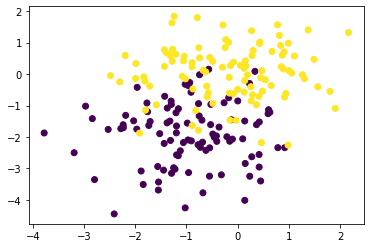

In [37]:
N = 200
x = np.vstack((
    np.vstack((np.random.randn(N//2)-1,np.random.randn(N//2)-2)).T,
    np.vstack((np.random.randn(N//2),np.random.randn(N//2))).T
))
y = np.concatenate((np.zeros(N//2),np.ones(N//2)))
plt.scatter(x[:,0], x[:,1], c=y)

**2. feladat.** Végezze el a **maximum likelihood** becslést, számolja ki a pontosságot! Fontos:

- Használjon mátrix-műveleteket (összesen egy `for` ciklust lehet leírni a training iterációknak megfelelően).
- A training halmazon (most csak ilyen van) a pontosság legyen legalább 80%.

In [38]:
def sig(a):
  return 1/(1 + exp(-a))
p = np.hstack([np.ones((N,1)), x]) #phi
w = np.zeros(p.shape[1])  #init w

for i in range(1000):
  sigm = sig(p@w) #sigmoid
  w += 0.005*p.T@(y-sigm) #learning rate * Phi transpose * (y-s), just like in the formula above

prd = p@w > 0
mean(y == prd)

0.875

**3. feladat.** Számítsa ki a $\mathbf{\Phi}$ mátrixot az órán látott módon (Gauss RBF függvény):

$$
\mathbf{\Phi}_{ij} = e^{-\gamma \left\|\mathbf{x}_i - \mathbf{x}_j \right\|^2} .
$$

- Használjon mátrix-műveleteket (nem lehet `for` ciklust leírni).

In [39]:
def rbf(xi, xj, gamma):
  xixi = np.sum(xi*xi, axis=1)
  xjxj = np.sum(xj*xj, axis=1)
  xixj = np.add.outer(xixi,xjxj)
  return np.exp(-gamma*(xixj-2*xi@xj.T))

rbf(x, x, 0.01)

array([[1.        , 0.92646085, 0.93080222, ..., 0.9675854 , 0.97889333,
        0.9998936 ],
       [0.92646085, 1.        , 0.99825857, ..., 0.87693317, 0.97691186,
        0.93135494],
       [0.93080222, 0.99825857, 1.        , ..., 0.89447291, 0.98290287,
        0.93524978],
       ...,
       [0.9675854 , 0.87693317, 0.89447291, ..., 1.        , 0.95615475,
        0.96555634],
       [0.97889333, 0.97691186, 0.98290287, ..., 0.95615475, 1.        ,
        0.98096906],
       [0.9998936 , 0.93135494, 0.93524978, ..., 0.96555634, 0.98096906,
        1.        ]])

Fentebb látható, a ^2 azonosság által felírt megoldás illetve a végeredményként kapott hasonlósági mátrix.

**4. feladat.** Végezze el a **maximum a posteriori** becslést a fenti $\mathbf{\Phi}$ mátrixszal.

In [65]:
gamma, alpha = 1., 0.1
p = rbf(x, x, gamma) #phi
w = np.zeros(p.shape[1])  #init w

for i in range(10000):
  sigm = sig(p@w) #sigmoid
  w += 0.005*p.T@(y-sigm) - alpha*w #learning rate * Phi transponalt * (y-s), mint a fenti kepletben

prd = p@w > 0
mean(y == prd)

0.87

**5. feladat.** Ábrázolja a becsült osztályvalószínűségek szintvonalait a mintákkal közös ploton! Vizsgálja meg az $\alpha$ és $\gamma$ paraméterek hatását az illesztésre (alulilleszkedés, túlilleszkedés).

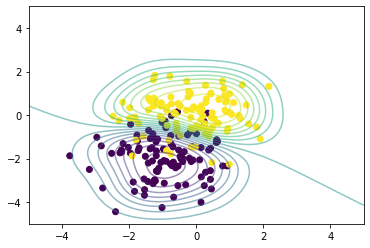

In [66]:
# teszt adatok (grid)
tx,ty = np.meshgrid(np.linspace(-5,5,100), np.linspace(-5,5,100))
xt    = np.vstack((tx.flatten(),ty.flatten())).T # teszt adatok
pteszt = rbf(xt, x, gamma)
# modell becslése a teszt adatokra
est = sig(pteszt@w)

plt.contour(tx, ty, est.reshape(100,100), 20, alpha=0.5)
plt.scatter(x[:,0], x[:,1], c=y)

A következő alfákkal (1. gamma mellett) próbálkoztam: 0.01, 0.00001-nél túlilleszkedést, 0.999-nél alulilleszkedést fedeztem fel.

Gammára ez (0.1 alfa mellett):  1., 0.00001-nél túl, 10.0-nál alulilleszkedést fedeztem fel.

## 2. Multilayer perceptron

A többrétegű neurális hálók tanítása általában az előadáson megbeszélt módon, a backpropagation algoritmussal történik. Ennek implementációja meghaladná a gyakorlat kereteit; helyette a scikit-learn csomagot fogjuk használni.

**6. feladat.** Az alábbi blokk futtatásával töltse be az adatokat és a szükséges csomagokat!

In [67]:
import pandas as pd

from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve,auc

data = pd.read_csv('https://datahub.io/machine-learning/spambase/r/spambase.csv')
x = data.values[:,:-1]
y = data.values[:,-1]
data.head(5)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


**7. feladat.** Ismerkedjen meg az importált függvényekkel, majd végezze el a következő lépéseket:

- Adatok bontása tanító- és teszthalmazra (pl. 5-szörös keresztkiértékelés).
- MLP paraméterezése, tanítása.
- A prediktív teljesítmény kiértékeléséhez jelenítse meg a ROC görbéket, valamint számítsa ki az AUC értéket.

[[0.000e+00 6.400e-01 6.400e-01 ... 3.756e+00 6.100e+01 2.780e+02]
 [2.100e-01 2.800e-01 5.000e-01 ... 5.114e+00 1.010e+02 1.028e+03]
 [6.000e-02 0.000e+00 7.100e-01 ... 9.821e+00 4.850e+02 2.259e+03]
 ...
 [0.000e+00 0.000e+00 0.000e+00 ... 9.186e+00 1.260e+02 9.370e+02]
 [0.000e+00 0.000e+00 2.400e-01 ... 2.868e+00 4.400e+01 1.750e+02]
 [0.000e+00 0.000e+00 3.200e-01 ... 1.494e+00 1.000e+01 1.390e+02]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_ranking.py:800: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_ranking.py:88: RuntimeWarning: invalid value encountered in less
  if np.any(dx < 0):


[[0.0000e+00 0.0000e+00 3.2000e-01 ... 1.4940e+00 1.0000e+01 1.3900e+02]
 [7.8000e-01 0.0000e+00 7.8000e-01 ... 2.6270e+00 2.2000e+01 1.1300e+02]
 [0.0000e+00 0.0000e+00 0.0000e+00 ... 1.0578e+01 1.0800e+02 6.0300e+02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00 ... 1.1420e+00 2.0000e+00 8.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00 ... 1.9090e+00 5.0000e+00 2.1000e+01]
 [0.0000e+00 0.0000e+00 0.0000e+00 ... 1.0000e+00 1.0000e+00 7.0000e+00]]
[[  0.      0.      0.    ...   2.322  11.     72.   ]
 [  0.      0.      0.    ...   1.689  10.     49.   ]
 [  0.      0.      0.    ...   1.538   4.     20.   ]
 ...
 [  0.      0.      0.    ...   2.303  15.    129.   ]
 [  0.      0.      0.    ...   4.208  15.    101.   ]
 [  0.      0.      1.19  ...   2.724  13.     79.   ]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


[[  0.      0.      0.    ...   1.792  12.    224.   ]
 [  0.      0.      0.    ...   3.     11.     81.   ]
 [  0.      0.      0.    ...   1.8     5.      9.   ]
 ...
 [  0.      0.      0.    ...   1.      1.      3.   ]
 [  0.      0.      0.    ...   1.      1.      4.   ]
 [  0.      0.      0.    ...   1.      1.      3.   ]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


[[  0.      0.      0.    ...   1.      1.      3.   ]
 [  0.      0.      0.    ...   1.      1.      4.   ]
 [  0.      0.      0.    ...   1.      1.      3.   ]
 ...
 [  0.3     0.      0.3   ...   1.404   6.    118.   ]
 [  0.96    0.      0.    ...   1.147   5.     78.   ]
 [  0.      0.      0.65  ...   1.25    5.     40.   ]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


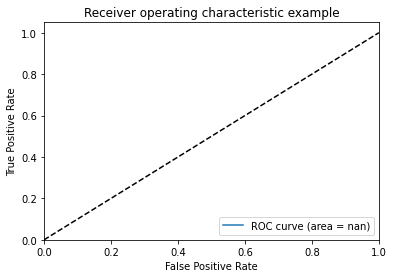

aux :nan


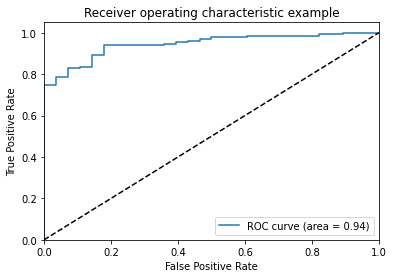

aux :0.9445467648942987


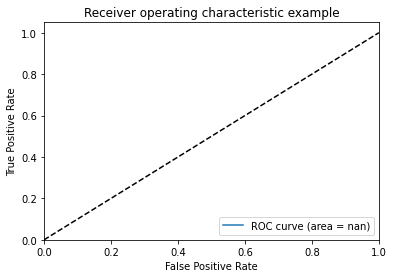

aux :nan


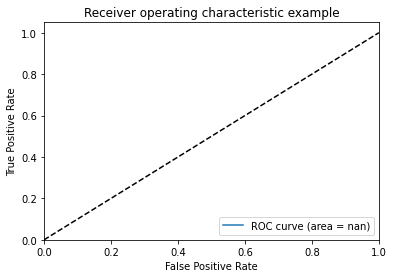

aux :nan


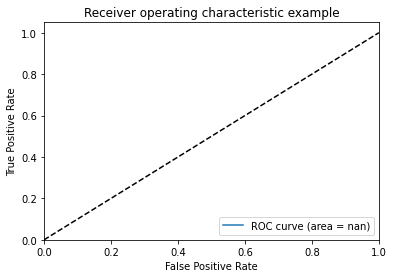

aux :nan


In [94]:
kf = KFold(n_splits=5)
kf.get_n_splits(x)
clf = MLPClassifier()
fpr = dict()
tpr = dict()
roc_auc = dict()
i = 0
for train_index, test_index in kf.split(x):
 
  X_train, X_test = x[train_index], x[test_index]
  Y_train, y_test = y[train_index], y[test_index]
  print(X_test)
  clf.fit(X_train, Y_train)
  score = clf.score(X_test, y_test)
  fpr[i], tpr[i], _ = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
  roc_auc[i] = auc(fpr[i], tpr[i])
  i = i + 1


for i in range(5):
  plt.figure()
  plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
  plt.plot([0, 1], [0, 1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic example')
  plt.legend(loc="lower right")
  plt.show()
  print('aux :' + str(roc_auc[i]))
